# Modern Movie Production: Maximizing Microsoft's Likelihood of Success

![](./images/emptytheatre.jpeg)

## Overview

This is a data driven technical analysis of the modern day movie industry, as requested by and intended for use solely by Microsoft and its new Head of Movie Production. The scope of this analysis is entirely confined to the movie industry, and does not include analysis of other potentially related industries that could be influential factors, such as the video gaming industry or television series industry.  


This analysis focuses heavily on a Return on Investment ('ROI') metric as the primary dependent variable, defined herein as `adjusted_gross`.  In as much, the analytics will utilize mean monthly budgetary ('spend'), and the monthly relative frequency of movies released as impact factors.  The primary relevant time period examined will be the past 20 years.

![](./images/theatreoutside.jpeg)

### Business Problem
Microsoft should be able to maximize the ROI of its newly created movie business by targeting specific months for the release of movies based on 1.) budgetary spending and 2.) the volume of movies released. An analysis of evidence gathered suggests that these factors have a strong, exponential impact on `adjusted_gross`.  

### Data Understanding

#### 1.  Definition of Adjusted Gross 
The movie industry has a rather strange way of calculating  **'gross'**  because the data seemingly fails to account for the cost of production in any calculations of same. Information available for review in this analysis would suggest that no movie has ever lost any money, even when worldwide gross falls below budgetary spending. The only reasonable conclusion is that either  1.) gross calculations in the data were set so they could not be negative, or 2.) budgetary spending figures were not included in the calculation of worldwide and domestic gross figures.  Out of an abundance of caution, this analysis will conservatively proceed on the assumption that the latter is true, and recalculate an `adjusted_gross` figure that subtracts production budget costs from the gross totals. 

#### 2.  *'The Numbers'* Dataset
The data used in this analysis was derived from [The Numbers](https://www.the-numbers.com)  ('TN'), dataset, which was pulled from a website of the same name that keeps worldwide gross, domestic gross, and budget information on nearly 6,000 movies. TN data was the most useful and comprehensive resource for implementing a well defined measure of `adjusted_gross`, which was ultimately determined to be the most important dependent factor for determining Microsoft's success. Notably, information in the TN dataset was found to be identical to another data source available to this analysis, [RT Budgets](https://www.rottentomatoes.com/); thus, selection between the two resources was arbitrary.   
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
%matplotlib inline

#import standard python libraries for data calculations and visualizations 

In [2]:
TN = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
TN
#we read in the full dataset from 'The Numbers'.  This is the dataset we will utilize to engineer our 
# return on investment metric.  The Numbers dataset is a literal copy of the RT_budgets dataset.   

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
TN = TN.drop('id', axis = 1)
# we drop our the first column because it has no value to us. 


In [4]:
TN.duplicated(subset=['movie', 'release_date']).sum()

0

In [5]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB


The dataset has exactly 5782 records without duplicates or missing data; however, the information is currently in string format.  

###  Cleaning and Preparing Data for Analysis

Cleaning and normalizing the columns containing our numerical data: worldwide gross, domestic gross, and production budget, will allow the study to engineer a new adjusted gross profit feature. We begin by normalizing the data in those columns.  

In [6]:
# we remove commas from numerical columns so we can convert numerical columns to integers
TN['domestic_gross'] = TN['domestic_gross'].str.replace(',', '')
TN['worldwide_gross'] = TN['worldwide_gross'].str.replace(',', '')
TN['production_budget'] = TN['production_budget'].str.replace(',', '')

In [7]:
# we remove $ signs from numerical columns and convert columns to integers in order 
# to perform calculations.  
TN['domestic_gross'] = TN['domestic_gross'].map(lambda x: x.strip('$')).astype(int)
TN['worldwide_gross'] = TN['worldwide_gross'].map(lambda x: x.strip('$')).astype(int)
TN['production_budget'] = TN['production_budget'].map(lambda x: x.strip('$')).astype(int)

### Creating Proper Metrics to Measure Success.  

As mentioned above, this analysis will create an adjusted gross metric which will be used as a measure of ROI. To create this feature, `production_budget` is subtracted from `worldwide_gross`. 

In [8]:
#  we subtract domestic gross from worldwide gross to get foreign gross. 
#  we add domestic gross back to foreign gross and get the 
TN['foreign_gross'] = TN['worldwide_gross'] - TN['domestic_gross'] 
TN['worldwide_gross'] = TN['foreign_gross'] + TN['domestic_gross']
TN['adjusted_gross'] = TN['worldwide_gross'] - TN['production_budget']
TN['adjusted_gross'].astype(int)

0       2351345279
1        635063875
2       -200237650
3       1072413963
4        999721747
           ...    
5777         -7000
5778        234495
5779         -3662
5780         -1400
5781        179941
Name: adjusted_gross, Length: 5782, dtype: int64

We convert our `release_date` column to a pd.to_datetime format type so that we can properly compare our variables accurately over time.  We then engineer both `year` and `months` features, which will allow for quick subsetting of data and comparisons based on aggregated monthly values. 

In [9]:
TN.release_date = pd.to_datetime(TN.release_date)
# We convert to pd.datetime to make our date calculations accurate.
TN['year'] = pd.DatetimeIndex(TN['release_date']).year
# we will create a year column in order to quickly subset by periods of time.   
# we create a months column so that we can filter our data by the most months.  
TN['months'] = TN['release_date'].apply(lambda x:x.strftime('%B'))

In [10]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
 5   foreign_gross      5782 non-null   int64         
 6   adjusted_gross     5782 non-null   int64         
 7   year               5782 non-null   int64         
 8   months             5782 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 406.7+ KB


In [11]:
TN.describe().astype(int)

,production_budget,domestic_gross,worldwide_gross,foreign_gross,adjusted_gross,year
count,5782,5782,5782,5782,5782,5782
mean,31587757,41873326,91487460,49614134,59899703,2003
std,41812076,68240597,174719968,113119236,146088881,12
min,1100,0,0,0,-200237650,1915
25%,5000000,1429534,4125414,0,-2189070,2000
50%,17000000,17225945,27984448,5701765,8550285,2007
75%,40000000,52348661,97645836,46821100,60968501,2012
max,425000000,936662225,2776345279,2015837654,2351345279,2020


### Defining a Relevant Timeframe 
The TN dataset stretches nearly 100 years, including movies going all the way back to 1920.  Yet, the bulk of the dataset sample exists in the post 2000 universe of cases.  It would be a mistake to ignore the impact of historical change in the movie industry, especially events in the past 30 years that have permanently altered video screens to make them smaller, faster, and more accessible.  In light of these uncertain factors (which are beyond the scope of this analysis) we will aim to control for them by subsetting the timeframe. However, a quick subset of the timeframe to 40 years (1980-2020), illustrates the concerns/justifications for a 20 year timeframe.   

In [12]:

TN_loss = TN[TN['adjusted_gross'] < 0]
TN_profit = TN[TN['adjusted_gross'] >= 0]
TN_prof_adj = TN_profit[TN_profit['release_date'] >= '1980-1-1']
TN_loss_adj = TN_loss[TN_loss['release_date'] >= '1980-1-1']
# We create two conditions to separate profit and loss and
# distinguish loss and profit in our initial visualizations
# We then subset the timeframe and only include data from 1980 to the present.  


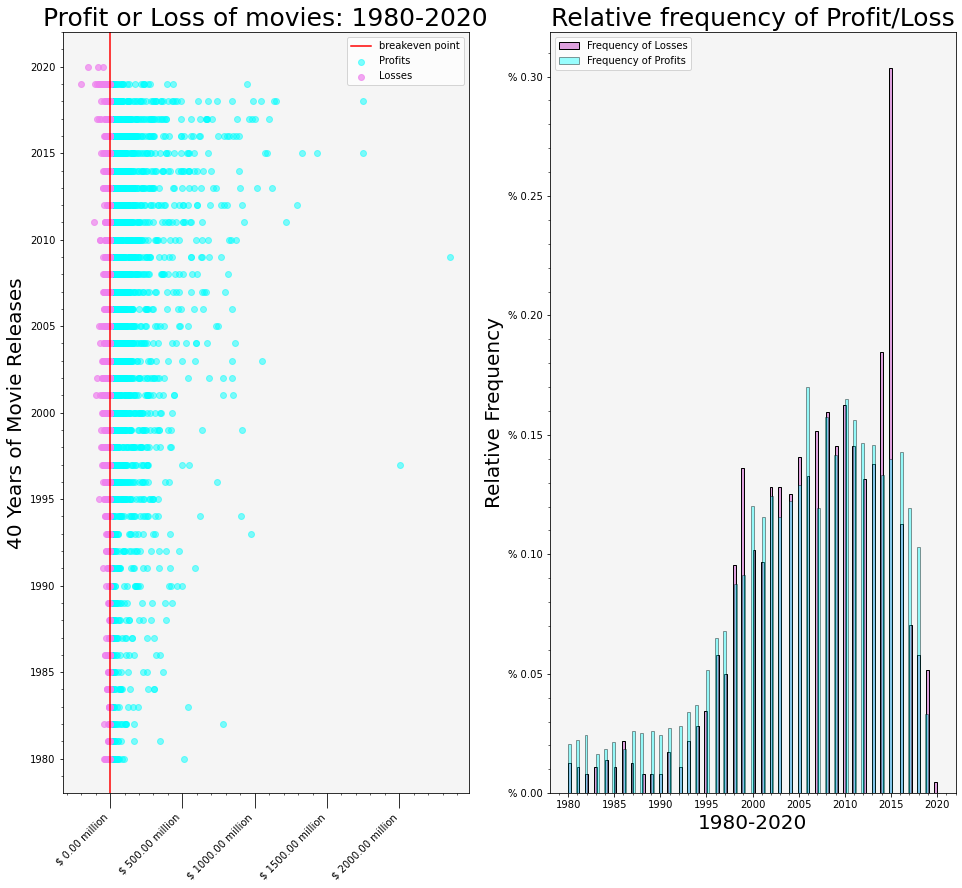

In [13]:
# instantiating our subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 14))
# matplotlib function for customn scatterplots
axes[0].scatter(
        x=TN_prof_adj['adjusted_gross']/1000000,
        y=TN_prof_adj['year'],
        alpha=.5,
        color="cyan")
axes[0].scatter(
        x=TN_loss_adj['adjusted_gross']/1000000,
        y=TN_loss_adj['year'],
        alpha=.7,
        color="violet")
axes[0].set_facecolor("whitesmoke")
labels = axes[0].get_xticklabels()
plt.setp(labels,
         rotation=45, 
         horizontalalignment='right')
# formatter allows us to manipulate the major tick lables
axes[0].xaxis.set_major_formatter('$ {x:1.2f} million')
axes[0].xaxis.set_tick_params(which='major', labelcolor='black', size=15,
                         labelleft=True, labelright=False)
# For the minor ticks, use no labels; default autoFormatter.
axes[0].xaxis.set_minor_locator(AutoMinorLocator())
axes[0].yaxis.set_minor_locator(AutoMinorLocator())

axes[0].set_title('Profit or Loss of movies: 1980-2020', size=25)
axes[0].set_ylabel('40 Years of Movie Releases', rotation=90, size=20)
axes[0].axvline(0, 0, 1, color='red', label='breakeven point')
axes[0].legend(['breakeven point', 'Profits', 'Losses'], loc='upper right');

axes[1].hist(TN_loss_adj['year'], rwidth=1.9, bins=130, edgecolor='k', color='plum', density=True)
axes[1].hist(TN_prof_adj['year'], rwidth=1.7, bins=130, edgecolor='k', color='aqua', alpha=.4, density=True)

axes[1].set_facecolor("whitesmoke")
axes[1].set_title('Relative frequency of Profit/Loss', size=25)
axes[1].set_xlabel('1980-2020', size=20)
axes[1].set_ylabel('Relative Frequency', size=20)
axes[1].yaxis.set_major_formatter('% {x:1.2f}')
axes[1].yaxis.set_tick_params(which='major', labelcolor='black', labelleft=True, labelright=False)
axes[1].yaxis.set_minor_locator(AutoMinorLocator())
axes[1].xaxis.set_minor_locator(AutoMinorLocator())

axes[1].legend(['Frequency of Losses', 'Frequency of Profits'], loc='upper left');
        
plt.savefig("./images/profitloss1980_2020.png", dpi=150)
plt.show();

#### Making movies has gotten riskier in the last two decades
Looking at the scatterplot on the top left, prior to 1995, the blue is a constant peppering across the positive range while the purple almost nonexistently hugs the breakeven point.  Likewise, in the frequency chart on the top right, the blue bars tops during the pre-1997 era and are well represented as a part of the overall relative frequency distribution.  Things clearly change around 2000.  While by no means does this data suggest that making movies did not remain a strongly profitable venture; instead, the past two decades more accurately reflect the heightened risk environment that currently exists as the big screens moved to smaller screens.  As such, it was determined that the risk profile of the shortened timeframe outweighed the loss of additional data.  
  

#### Readjusting the Timeframe: 2000-2020

In [14]:
# We further subset the timeframe in order to capture a more representave years
# TN_prof_adj = TN_profit[TN_profit['release_date'] >= '1980-1-1']
# TN_loss_adj = TN_loss[TN_loss['release_date'] >= '1980-1-1']
TN = TN.loc[TN['year'] >= 2000]
TN_loss_2000 = TN[TN['adjusted_gross'] < 0]
TN_profit_2000 = TN[TN['adjusted_gross'] >= 0]
TN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4387 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       4387 non-null   datetime64[ns]
 1   movie              4387 non-null   object        
 2   production_budget  4387 non-null   int64         
 3   domestic_gross     4387 non-null   int64         
 4   worldwide_gross    4387 non-null   int64         
 5   foreign_gross      4387 non-null   int64         
 6   adjusted_gross     4387 non-null   int64         
 7   year               4387 non-null   int64         
 8   months             4387 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 342.7+ KB


In [15]:
TN.describe().astype(int)

,production_budget,domestic_gross,worldwide_gross,foreign_gross,adjusted_gross,year
count,4387,4387,4387,4387,4387,4387
mean,34508230,41831098,96932197,55101099,62423966,2009
std,45509048,71268663,186210106,121413663,153441039,5
min,1100,0,0,0,-200237650,2000
25%,5000000,550737,2689139,180587,-2355710,2005
50%,18000000,15331289,29367143,10000000,7719879,2010
75%,43000000,51749047,101473665,50765522,63175527,2014
max,425000000,936662225,2776345279,2015837654,2351345279,2020


With 4,387 movies, this analysis remains reliable even if we adjust our dates to include data from only 2000-2020.   

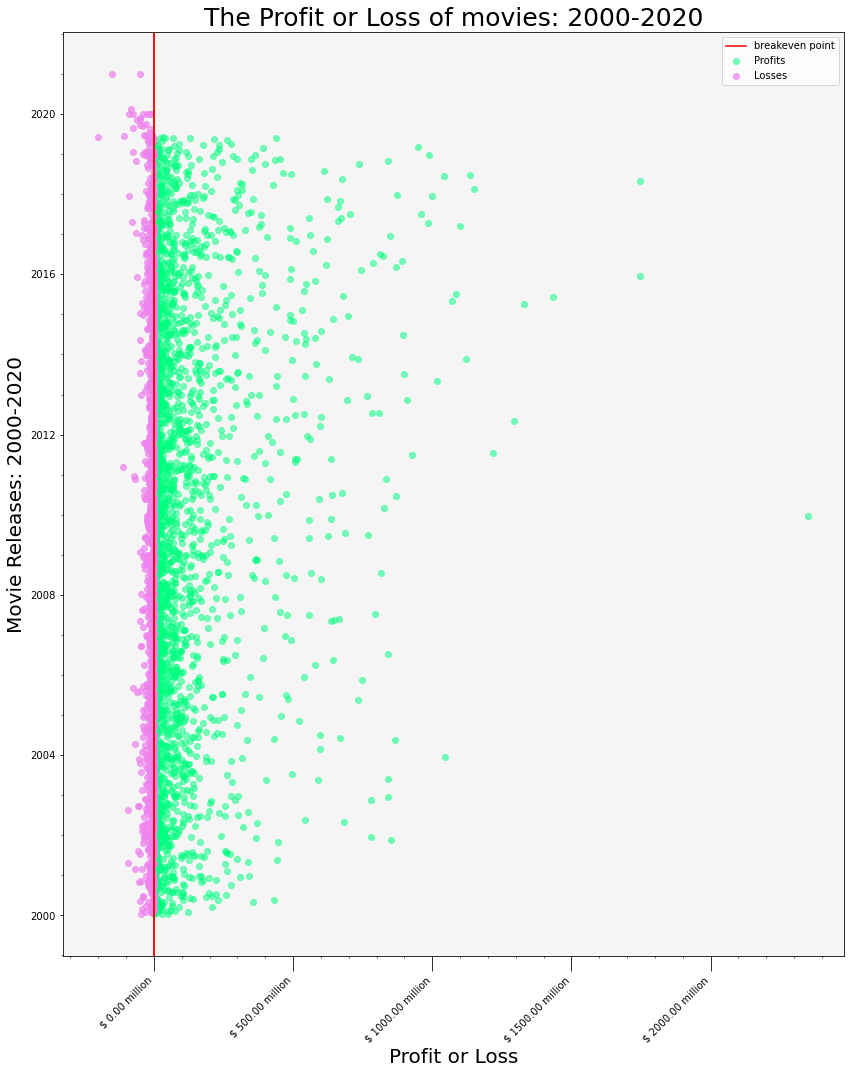

In [16]:
fig, ax = plt.subplots(figsize=(14, 17))
ax.scatter(
    x=TN_profit_2000['adjusted_gross']/1000000,
    y=TN_profit_2000['release_date'],
    alpha=.5,
    color="springgreen")
ax.scatter(
    x=TN_loss_2000['adjusted_gross']/1000000,
    y=TN_loss_2000['release_date'],
    alpha=.7,
    color="violet")

ax.set_facecolor("whitesmoke")
labels = ax.get_xticklabels()
plt.setp(labels,
         rotation=45, 
         horizontalalignment='right')

ax.xaxis.set_major_formatter('$ {x:1.2f} million')
ax.xaxis.set_tick_params(which='major', labelcolor='black', size=15,
                         labelleft=True, labelright=False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.set_title('The Profit or Loss of movies: 2000-2020', size=25)
ax.set_xlabel('Profit or Loss', size=20)
ax.axvline(0, 0, 1, color='red', label='breakeven point')

ax.set_ylabel('Movie Releases: 2000-2020', rotation=90, size=20)
ax.legend(['breakeven point', 'Profits', 'Losses'], loc='upper right');

plt.axvline(0, 0, 1, color='red')
plt.savefig("./images/profitloss2000-2020.png", dpi=150)
plt.show();

The overflow at the top left on the loss side of the scatterplot spectrum is really noticeable now; however, this is a statistiscally insignificant sample size of just 70 films. 

## Analysis 


### Movie Release Date by Month


In [17]:
# we group our data by month and aggregate to get the mean of our values,   
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
TN['months'] = pd.Categorical(TN['months'], categories=months, ordered=True)
months_df = TN.groupby('months').mean().astype(int)
months_df

,production_budget,domestic_gross,worldwide_gross,foreign_gross,adjusted_gross,year
months,,,,,,
January,23443203,26804042,56560671,29756629,33117468,2010
February,30654887,37605096,80109908,42504812,49455021,2009
March,34440629,40059618,87183573,47123955,52742943,2009
April,25672342,29135751,66553615,37417864,40881273,2009
May,54462698,69408811,175768519,106359708,121305820,2009
June,48571689,64476879,149774594,85297715,101202904,2009
July,46879713,61169065,151349335,90180270,104469622,2009
August,28248428,34014052,67715241,33701189,39466812,2008
September,22920105,22063446,47278700,25215253,24358595,2009


In [18]:
months_df.describe().astype(int)

,production_budget,domestic_gross,worldwide_gross,foreign_gross,adjusted_gross,year
count,12,12,12,12,12,12
mean,35033467,42624589,98876567,56251977,63843099,2008
std,11719834,16767664,45413291,28807803,33796626,0
min,21074396,22063446,47278700,25215253,24358595,2008
25%,25115057,28552823,64055379,32715049,37879476,2009
50%,32547758,38832357,83646740,44814383,51098982,2009
75%,47275852,59431310,148003154,86113440,99512029,2009
max,54462698,69408811,175768519,106359708,121305820,2010


In [19]:
# utilizing seaborn for the remaining visuals
sns.set_theme(style='darkgrid')

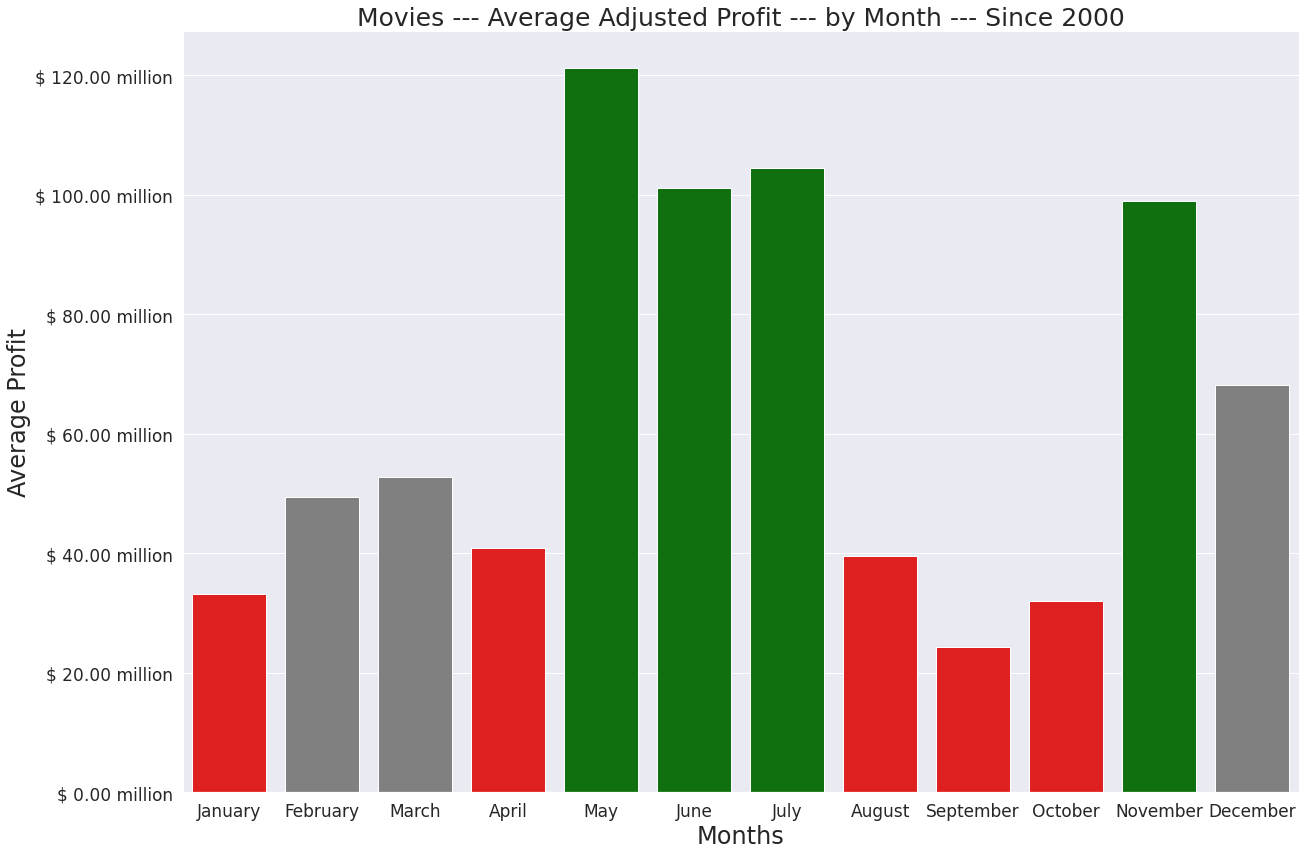

In [20]:
# Setting the figure size
fig, ax = plt.subplots(figsize=(20, 14)) 

# barplots and lineplots were most easy to understand the relationship of this data. We use orange to identify 
# months that average gross exceed a 90 million threshold, and red to identify months where average gross 
# fell below a 41 million threshold.  
colors = ['green' if profit > 90000000 else 'red' if profit < 41000000 else 'gray' for profit in months_df.adjusted_gross]
sns.barplot(x=months_df.index, y=months_df['adjusted_gross']/1000000, data=months_df, palette=colors, saturation =.75)

ax.set_xlabel('Months', size=24)
ax.set_ylabel('Average Profit', rotation=90, size=24)

ax.yaxis.set_major_formatter('$ {x:1.2f} million')
ax.tick_params(axis='both', which='major', labelsize=17)
# ax.tick_params(axis='both', which='minor', labelsize=8)

plt.title("Movies --- Average Adjusted Profit --- by Month --- Since 2000", size=25)
plt.savefig("./images/months2000-2020.png", dpi=150)
plt.show();

Interestingly, the most profitable months by far, on average, are May, July, June, and November.  In an effort to control for outliers, the study next removes any movies outside two standard deviations to the high side of our dataset, and recalculates the group mean aggregation.  

In [21]:
# we slice off the top 5 percent quantile and perform the same grouping of data, adjusting for outliers at the top.  
TN = TN.loc[TN['adjusted_gross'] <= TN['adjusted_gross'].quantile(.95)]
# we group our data by month and aggregate to get the mean of our values,   

below_95_profit = TN.groupby('months').mean().astype(int) 
below_95_profit

,production_budget,domestic_gross,worldwide_gross,foreign_gross,adjusted_gross,year
months,,,,,,
January,22994907,26355101,54787446,28432345,31792539,2010
February,29476809,31820061,65921228,34101167,36444419,2009
March,29953433,30441991,60405500,29963509,30452066,2009
April,22031905,22208878,43391442,21182563,21359537,2009
May,35989241,34506147,77841681,43335534,41852439,2009
June,37592123,40810643,85800512,44989869,48208388,2009
July,37676590,40240062,87473110,47233048,49796519,2008
August,26484110,30729530,59461321,28731790,32977211,2008
September,22745899,20922250,44577438,23655188,21831539,2009


In [22]:
below_95_profit.describe().astype(int)

,production_budget,domestic_gross,worldwide_gross,foreign_gross,adjusted_gross,year
count,12,12,12,12,12,12
mean,29257936,30425588,63943958,33518369,34686022,2008
std,6522648,6840537,15694108,9061015,9445456,0
min,20101016,20922250,43391442,21182563,21359537,2008
25%,22932655,25318545,52482558,27238055,29205769,2008
50%,29378094,30585760,61721887,32032338,33368052,2009
75%,36184385,35095232,78146674,42483258,41962288,2009
max,37676590,40810643,87473110,47233048,49796519,2010


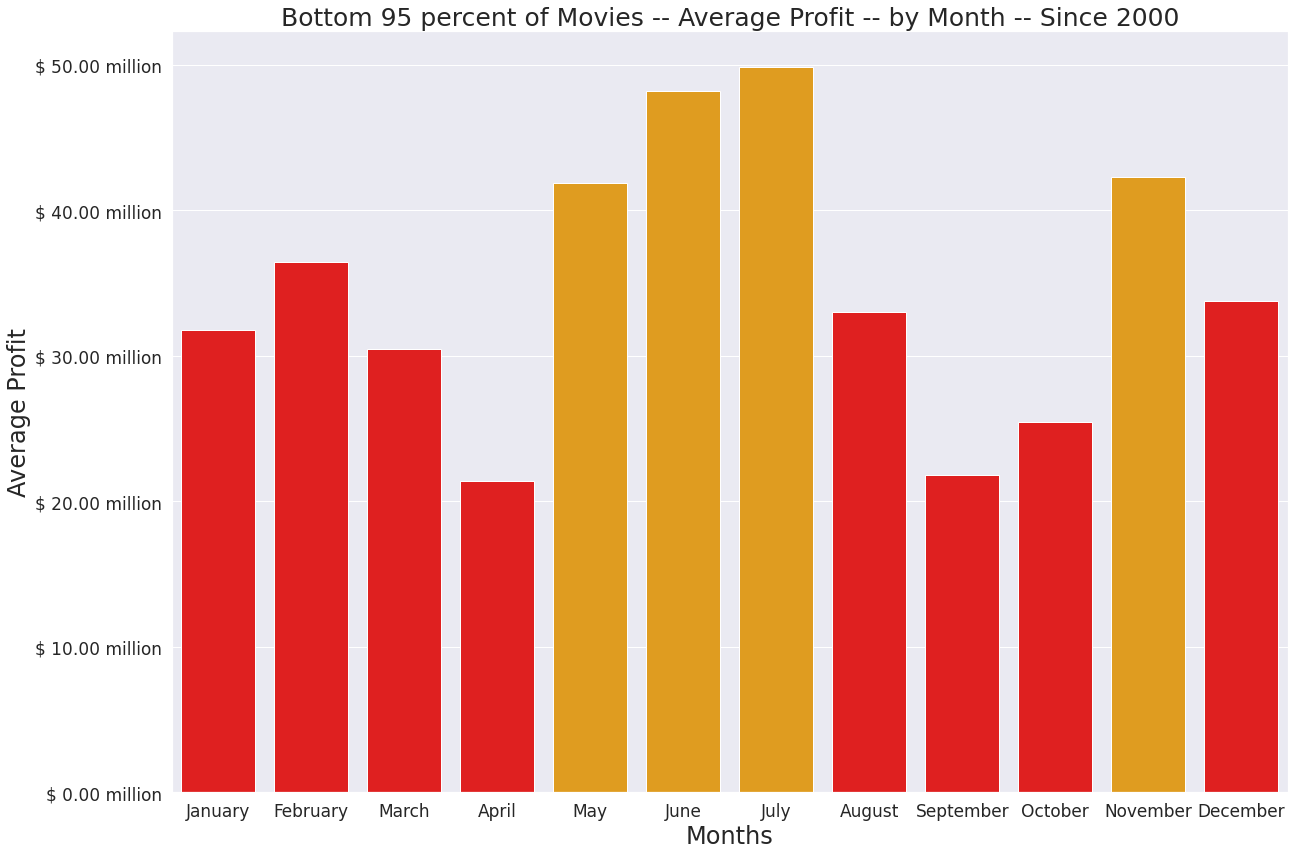

In [24]:
# Setting the figure size
fig, ax = plt.subplots(figsize=(20, 14)) 

color = ['orange' if p > 41000000 else 'red' for p in below_95_profit.adjusted_gross]
barplot = sns.barplot(x=below_95_profit.index, y=below_95_profit['adjusted_gross']/1000000, data=below_95_profit, palette=color, saturation =.75)

ax.set_xlabel('Months', size=24)
ax.set_ylabel('Average Profit', rotation=90, size=24)

ax.yaxis.set_major_formatter('$ {x:1.2f} million')
ax.tick_params(axis='both', which='major', labelsize=17)

plt.title("Bottom 95 percent of Movies -- Average Profit -- by Month -- Since 2000", size=25)
plt.savefig("./images/monthsbot95_2000-2020.png", dpi=150)
plt.show();

The two bar charts above reveal that the most profitable movies are released in the months of July, June, November, and May. This remained true even after removing those movies that had adjusted profit that was outside two standard deviations above the rest of the dataset.  On the other hand, the disparity between those highest months and other months shrank significantly.  Notably, December average adjusted gross revenue was on par with January/August and fell below February. 

### Relative Frequency Rate

The next part of our analysis will look at the monthly relative frequency by which those same movies were released during that same time period between 2000-2020. 

In [25]:
TN['months'].value_counts(normalize=True)

December     0.127430
October      0.103192
September    0.095272
August       0.087353
March        0.086393
April        0.085913
November     0.075354
February     0.072954
June         0.072234
July         0.069834
January      0.062395
May          0.061675
Name: months, dtype: float64

In [26]:
TN['months'].value_counts()

December     531
October      430
September    397
August       364
March        360
April        358
November     314
February     304
June         301
July         291
January      260
May          257
Name: months, dtype: int64

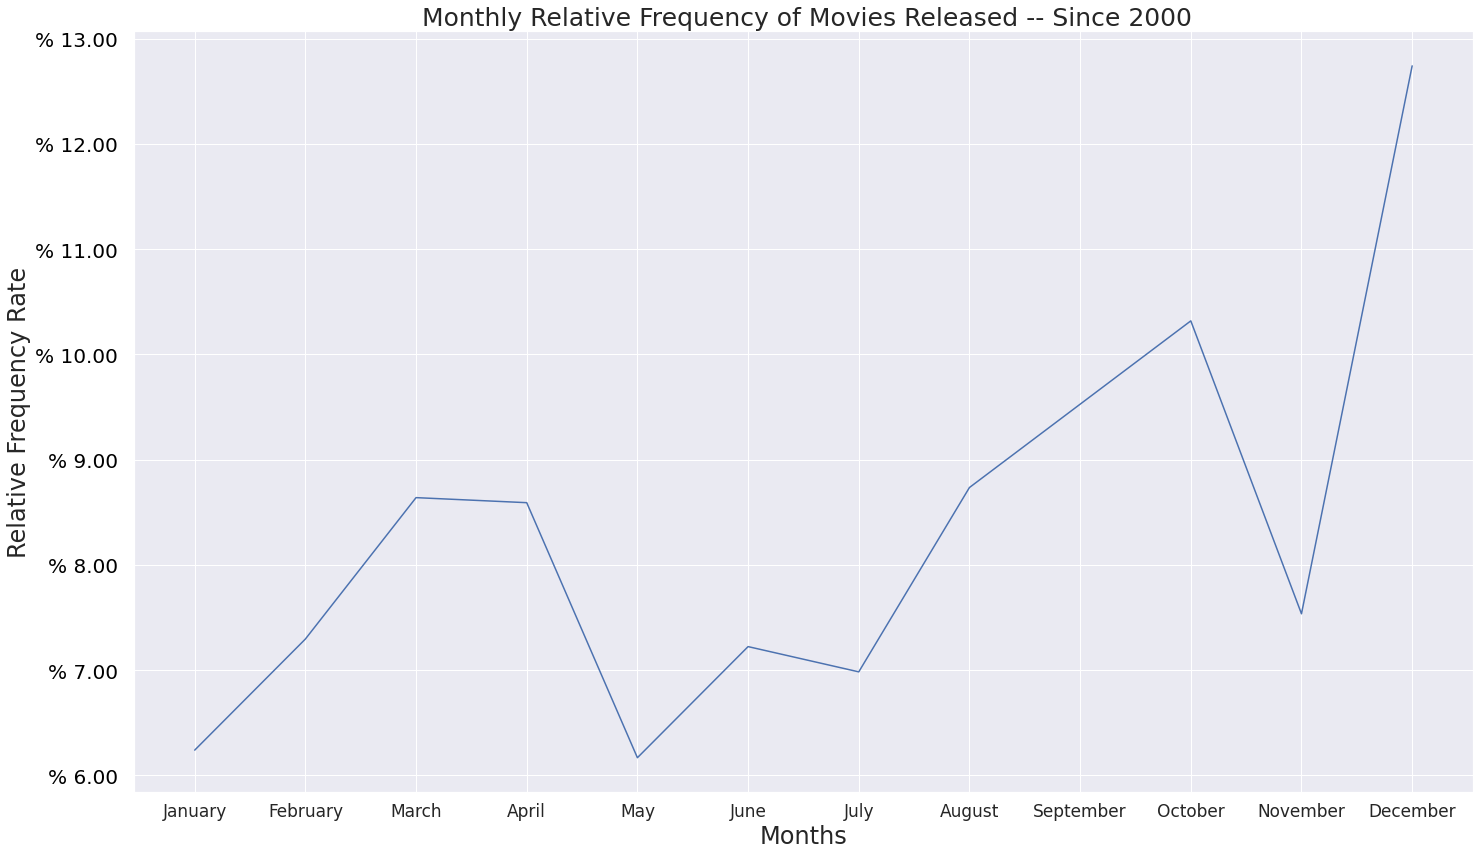

In [27]:
months_vc = TN['months'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(24, 14))
sns.set_theme()
# again, a basic line plot was easy to understand 
sns.lineplot(data=months_vc*100)
ax.yaxis.set_major_formatter('% {x:1.2f} ')
# we could have also used percent formatter here
ax.yaxis.set_tick_params(which='major', labelcolor='black', labelsize=20,
                         labelleft=True, labelright=False)
ax.xaxis.set_tick_params(which='major', labelsize=17)
ax.set_xlabel('Months', size=24)
ax.set_ylabel('Relative Frequency Rate', size=24)
plt.title(" Monthly Relative Frequency of Movies Released -- Since 2000", size=25)
plt.savefig("./images/RelFreqmonths2000-2020.png", dpi=150)
plt.show()

Notably, the average most profitable months to release movies are **NOT** the same months in which the most movies are released.  On its face, the data is not reconcilable. For example, there are nearly twice as many movies released in December than in May, yet movies in the month of May are in the neighborhood of 85 percent more profitable on average. In addition, September has the one of the lowest monthly averages of `adjusted_gross`, yet it has a relatively high frequency rate for movies released.   

### Movie Production Budget

In order to describe the seeming conflict between monthly adjusted_gross and the relative frequency rates, the next step in this analysis evaluates the influence of movie production budget on overall movie profitability between 2000 and 2020.  As such, a visualization of budgetary spend on average, per month, compared with average monthly worldwide_gross will be helpful. 

In [28]:
# we subset the data we are using. Then we group by month, and get the averages of our ww gross values.

TN_line = TN[['production_budget', 'worldwide_gross']].sort_values('worldwide_gross')
TN_line = TN.groupby('months').mean()
# ww gross gets us the profit margin.  

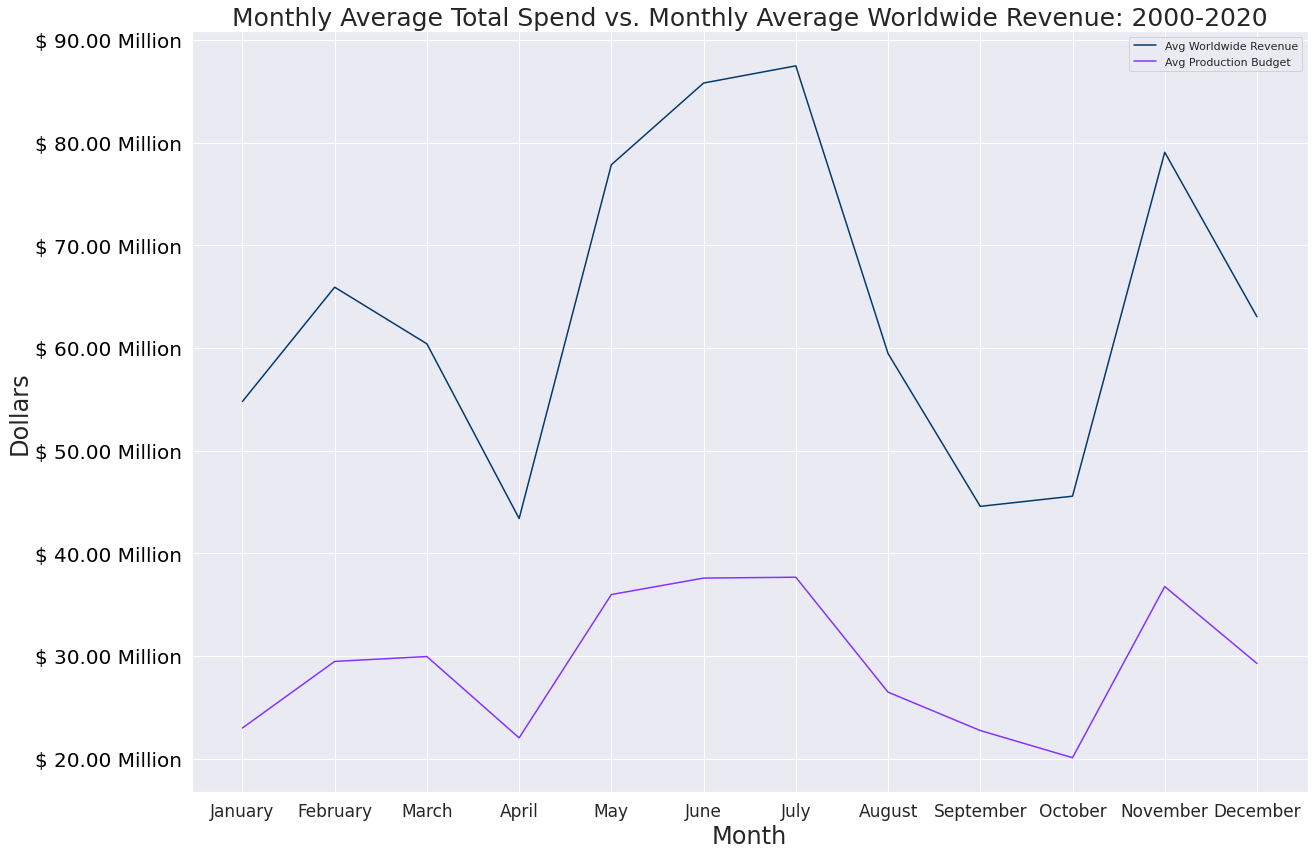

<Figure size 432x288 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize=(20, 14))

sns.set_theme()
ax.plot(TN_line.index, 'worldwide_gross', data=TN_line/1000000, color='#03396c')
ax.plot(TN_line.index, 'production_budget', data=TN_line/1000000, color='#8333FF')

ax.set_xlabel('Months', size=20)
ax.set_ylabel('Dollars', size=20)

ax.yaxis.set_major_formatter('$ {x:1.2f} Million')
ax.yaxis.set_tick_params(which='major', labelcolor='black', labelsize=20,
                         labelleft=True, labelright=False)
ax.xaxis.set_tick_params(which='major', labelsize=17)
ax.set_title('Monthly Average Total Spend vs. Monthly Average Worldwide Revenue: 2000-2020', size=25)
ax.set_xlabel('Month', size=24)
ax.set_ylabel('Dollars', size=24)
ax.legend(['Avg Worldwide Revenue', 'Avg Production Budget'], loc='upper right');
plt.savefig("./images/budg_profmonths2000-2020.png", dpi=150)
plt.show()
plt.tight_layout();

This visual reveals that July, June, May and November, not only average the highest gross profit, but also average the highest budgetary spending. Indeed, there seems to be an exponential relationship between the average budget spend and the average adjusted gross profit for movies released in July, June, May and November.  

On the other hand, December seems to be a month of low budget movies with a relatively healthy profit margin.  This is true for Janaury and February as well. Meanwhile, April and September seem to have tight margins.  

## Recommendations

The findings of this analysis lead to several recommendations that would greatly improve the likelihood that Microsoft will find success in their movie content origination business. They are as follows:

- **Consider a relatively low number of big budget, blockbuster type movies, to be released in the months of May, June, July, and November.** Even though there are at least six months where a higher volume of movies are released per month, the months of May, June, July and November boast on average the highest adjusted gross profit. On average, the more money spent producing movies released in these months seemed to yield exponentially greater adjusted gross profit. This held true even after the top five percent of movies were removed from the results.   


- **Consider releasing high volume, low budget movies in December and small number of low budget films in January and February.**  December has had the highest volume of movies released, per month, during the past 20 years.  Yet, the overall average spending in December fell well below the likes of May, June, July, and November.  Still, December had a seemingly healthy profit margin. Thus, it is reasonable to conclude that low budget seasonal movies that are easily mass produced should be an effective strategy for December.   
 

 >*Caveat:* *The above recommendation could change depending on the outcome of a further examination of movies contained in the bottom 95 percent of average monthly gross, as this change seemingly impacted December results, suggesting that profitability was artificially inflated by outliers.  Moreover, while February boasted levels of both mean adjusted profit and spending similar to December, there were far fewer movies made in February. January, had a healthy profit margin; yet, it contained the fewest number of films released per month on average.* 


- **Put more money into those movies released in June, July, November, and May, and avoid releasing movies in September or April, or any of the other months where there is a low profit margin.**  Arguably, not enough resources are being utilized to generate movies in May, June, July, or November, especially considering the fact that September is getting over 20 million invested has a relatively high frequency of movies being produced. This seems incomprehensible.

>*Caveat:  Again, this recommendation could change depending on a deeper analysis where the top 5 percent (movies with profit outside 2 standard deviations) is removed.  


## Additional Research

- **A deeper and more comprehensive analysis of the seemingly exponential relationship between big budgets and high margins in movies released in May, June, July, and November should be performed.** For example, a lateral study of those months focused on other factors could be helpful, perhaps including a pivot table incorporating various movie genres. 


- **As mentioned above, a deeper analysis of the results after the top five of highest monthly  average grossing movies is removed should provide clarity.** 


- **Further research and data gathering should be done to address the potential impact of Covid 19, the perceived ongoing paradigm shift rate for all video content distribution (less movies/more tv series), inflation, and other factors that could greatly alter the outcomes of this or any other analysis.**  


- **Finally, further research should be done to consider synergies between Microsoft's existing video content origination units in both gaming and computing.** 
